In [1]:
import pandas as pd
import glob
import numpy as np
import pandas as pd
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import plotly.graph_objects as go


In [2]:
def get_params_space(file_path, efs):
    
    linda_df = pd.read_csv(file_path, index_col=[0])
    linda_df = linda_df[['auc', 'precision', 'recall', 'sample_size', 'effect_size', 'sampling', 'iteration']]
    linda_df = linda_df.groupby(by = ['sample_size', 'effect_size', 'sampling']).mean().reset_index()
    
    linda_df = linda_df[linda_df['effect_size'] == efs].pivot(columns = 'sample_size', index='sampling', values = 'auc')
    return linda_df

In [3]:
wd = '/Users/zkarwowska/new_embl_folder/zeevi_dataset_v5/results/results_files/one_arm/'

linda_125 = get_params_space(wd+'linda.csv', 125)
linda_15 = get_params_space(wd+'linda.csv', 15)
linda_2 = get_params_space(wd+'linda.csv', 2)

maaslin_125 = get_params_space(wd+'Maaslin_clr.csv', 125)
maaslin_15 = get_params_space(wd+'Maaslin_clr.csv', 15)
maaslin_2 = get_params_space(wd+'Maaslin_clr.csv', 2)

zigmm_125 = get_params_space(wd+'zigmm.csv', 125)
zigmm_15 = get_params_space(wd+'zigmm.csv', 15)
zigmm_2 = get_params_space(wd+'zigmm.csv', 2)

/var/folders/9q/_zrfpjbd6djcym5nw2dyd59c0000gn/T/ipykernel_1428/1238641304.py:44: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



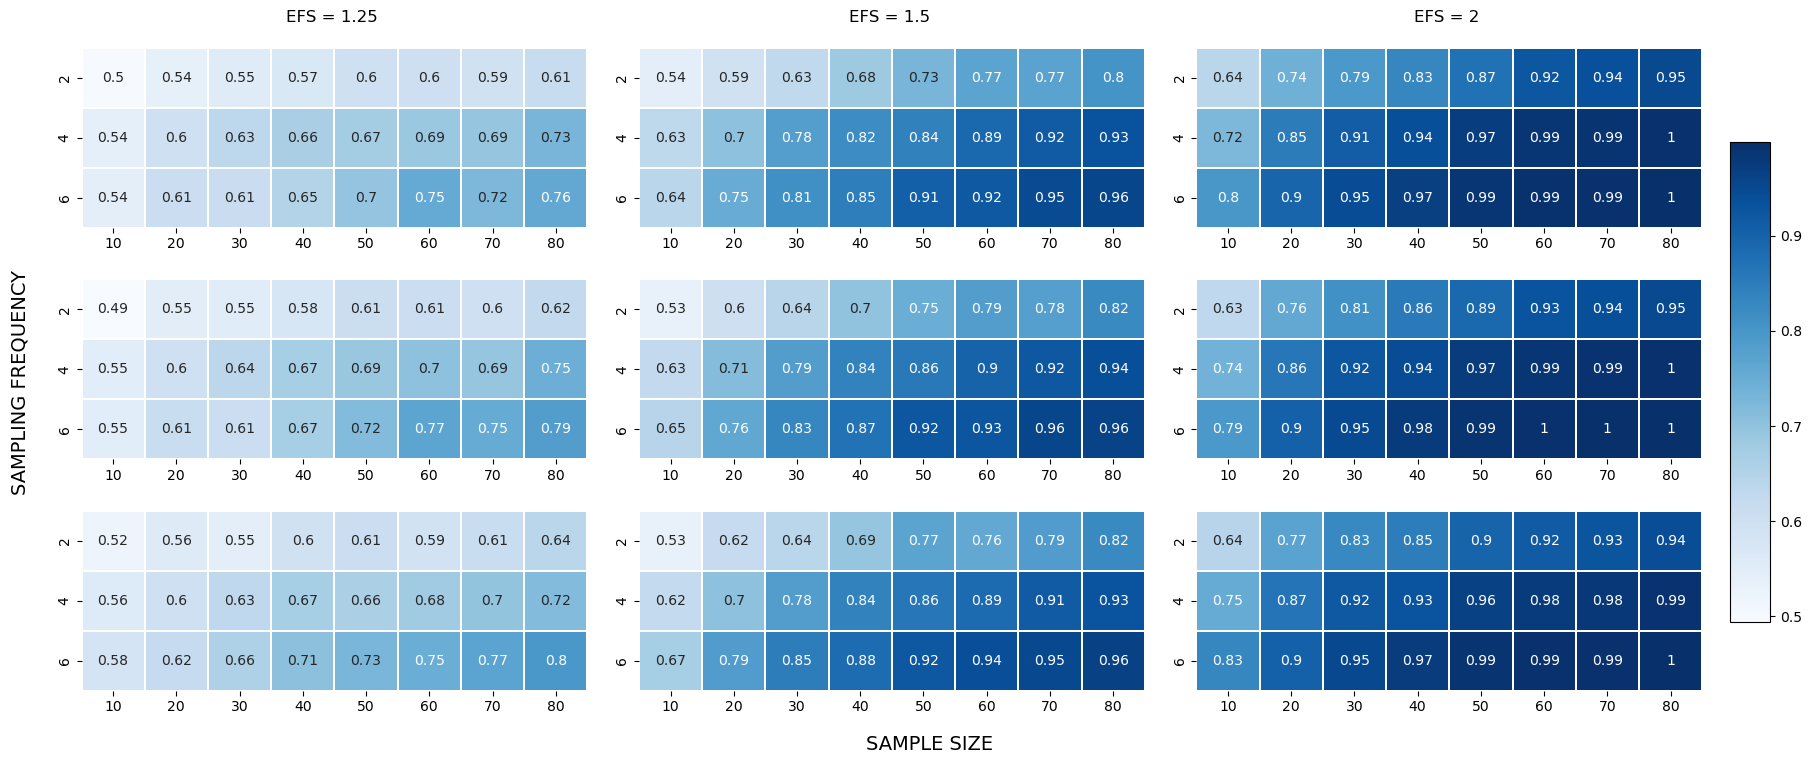

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(20, 8))

# Define a common colormap and color scale
cmap = "Blues"
vmin = min(np.min(data) for data in [linda_125, linda_15, linda_2, maaslin_125, maaslin_15, maaslin_2, zigmm_125, zigmm_15, zigmm_2])
vmax = max(np.max(data) for data in [linda_125, linda_15, linda_2, maaslin_125, maaslin_15, maaslin_2, zigmm_125, zigmm_15, zigmm_2])

# Create heatmaps
sns.heatmap(linda_125, cmap=cmap, annot=True, lw=.1, ax=axes[0, 0], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(linda_15, cmap=cmap, annot=True, lw=.1, ax=axes[0, 1], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(linda_2, cmap=cmap, annot=True, lw=.1, ax=axes[0, 2], cbar=False, vmin=vmin, vmax=vmax)

sns.heatmap(maaslin_125, cmap=cmap, annot=True, lw=.1, ax=axes[1, 0], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(maaslin_15, cmap=cmap, annot=True, lw=.1, ax=axes[1, 1], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(maaslin_2, cmap=cmap, annot=True, lw=.1, ax=axes[1, 2], cbar=False, vmin=vmin, vmax=vmax)

sns.heatmap(zigmm_125, cmap=cmap, annot=True, lw=.1, ax=axes[2, 0], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(zigmm_15, cmap=cmap, annot=True, lw=.1, ax=axes[2, 1], cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(zigmm_2, cmap=cmap, annot=True, lw=.1, ax=axes[2, 2], cbar=False, vmin=vmin, vmax=vmax)

# Remove individual x and y labels
for ax in axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")

# Add common labels
fig.text(0.5, 0.04, "SAMPLE SIZE", ha="center", fontsize=14)
fig.text(0.04, 0.5, "SAMPLING FREQUENCY", va="center", rotation="vertical", fontsize=14)

# Create a common colorbar
cbar_ax = fig.add_axes([.9, 0.2, 0.02, 0.6])  # Adjust position [left, bottom, width, height]
fig.colorbar(axes[0, 0].collections[0], cax=cbar_ax)

axes[0, 0].set_title("EFS = 1.25 \n")
axes[0, 1].set_title("EFS = 1.5 \n")
axes[0, 2].set_title("EFS = 2 \n")


# Adjust layout to fit colorbar and titles
plt.tight_layout(rect=[0.05, 0.05, 0.9, 1], pad=2)
plt.savefig('/Users/zkarwowska/Desktop/EMBL_project/zeevi_dataset_v5/optimal_params.png', dpi=300)
plt.show()

<Axes: xlabel='sample_size', ylabel='sampling'>

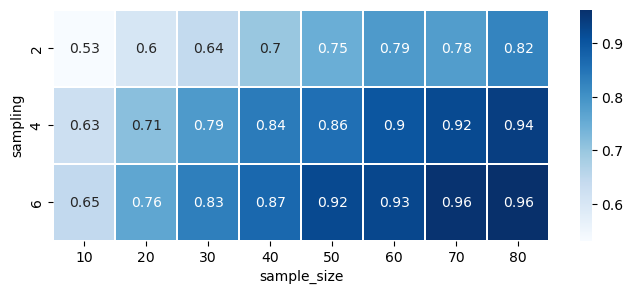

In [119]:
plt.figure(figsize = (8, 3))
sns.heatmap(maaslin_clr_df, cmap = 'Blues', annot=True, lw=.1)

<Axes: xlabel='sample_size', ylabel='sampling'>

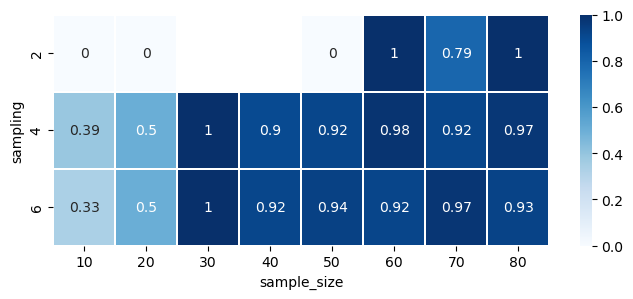

In [116]:
df = linda_df.pivot(columns = 'sample_size', index='sampling', values = 'precision')

plt.figure(figsize = (8, 3))
sns.heatmap(df, cmap = 'Blues', annot=True, lw=.1)

ValueError: Argument Z must be 2-dimensional.

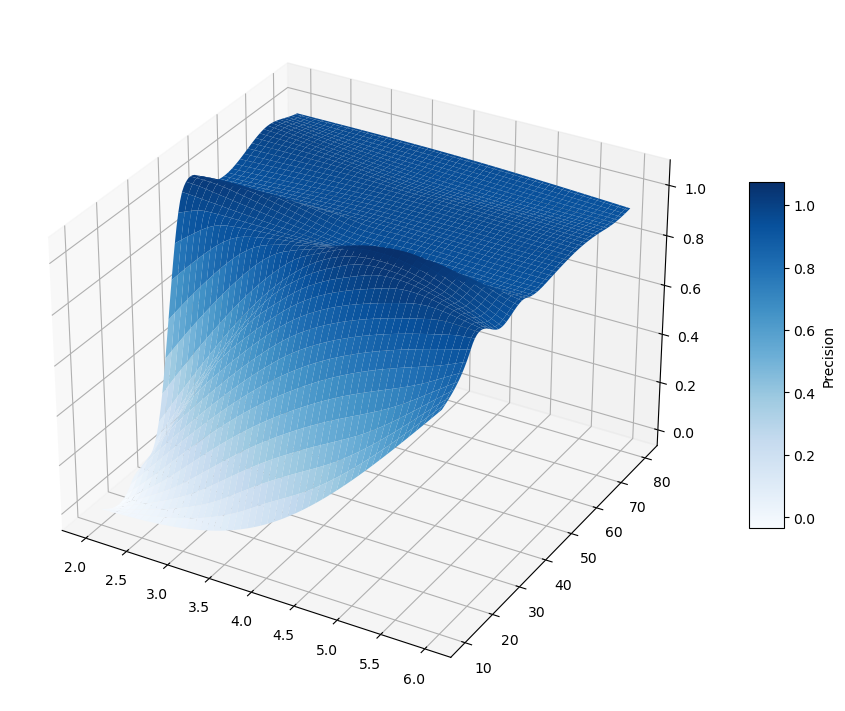

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming linda_df is a Pandas DataFrame with 'sampling', 'sample_size', and 'precision' columns
N = linda_df.sampling.values
M = linda_df.sample_size.values
precision = linda_df.precision.values

# Create a grid for interpolation with high resolution
N_lin = np.linspace(min(N), max(N), 100)  # Adjust the number of points as needed
M_lin = np.linspace(min(M), max(M), 100)
N_grid, M_grid = np.meshgrid(N_lin, M_lin)

# Interpolate the precision values onto the grid
precision_grid = griddata((N, M), precision, (N_grid, M_grid), method='cubic')

# Create a 3D figure
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(N_grid, M_grid, precision_grid, cmap='Blues', edgecolor='None', rstride=2, cstride=2)

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Precision')

# Set labels
ax.set_xlabel('Sample Size (N)')
ax.set_ylabel('Sampling Frequency (M)')
ax.set_zlabel('Precision')

# Adjust the view angle for better visualization
ax.view_init(elev=30, azim=220)

plt.show()

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming linda_df is a Pandas DataFrame with 'sampling', 'sample_size', and 'precision' columns
N = linda_df.sampling.values
M = linda_df.sample_size.values
precision = linda_df.precision.values

# Create a grid for interpolation with high resolution
N_lin = np.linspace(min(N), max(N), 100)  # Adjust the number of points as needed
M_lin = np.linspace(min(M), max(M), 100)
N_grid, M_grid = np.meshgrid(N_lin, M_lin)

# Interpolate the precision values onto the grid
precision_grid = griddata((N, M), precision, (N_grid, M_grid), method='cubic')

# Create a 3D figure
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(N_grid, M_grid, precision_grid, cmap='Blues', edgecolor='None', rstride=2, cstride=2)

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Precision')

# Set labels
ax.set_xlabel('Sample Size (N)')
ax.set_ylabel('Sampling Frequency (M)')
ax.set_zlabel('Precision')

# Create the hyperplane where precision = 0.8
# Define the precision value
precision_value = 0.8

# Create a hyperplane at precision = 0.8
hyperplane = np.full_like(precision_grid, precision_value)

# Plot the hyperplane
ax.plot_surface(N_grid, M_grid, hyperplane, col


SyntaxError: unexpected EOF while parsing (2369603676.py, line 42)